In [ ]:
from Constrained_Functions import *
from penguins_Algorithm_modified_3 import *
from ParticleSwarm import *

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
testProblems = pd.read_excel('TestFunctionsPaper.xlsx')

In [ ]:
problem = testProblems.iloc[0, :]
functionName, temp, lb, ub, num_dimensions = list(problem)
num_particles, max_iterations, inertia_weight, personal_weight, global_weight= 200, 100, 0.3, 0.1, 0.1
particle_swarm_optimization(num_particles, num_dimensions, max_iterations, inertia_weight, personal_weight, global_weight, functionName, lb, ub)[:2]

In [ ]:
num_particlesPararm = [50, 100, 150]
max_iterationsParam = [50, 100, 150]
inertia_weightParam = [0.1, 0.5, 0.8]
personal_weightParam = [0.1, 0.5, 0.8]
global_weightParam = [0.1, 0.5, 0.8]

In [53]:
FactorialDesing = pd.DataFrame([[i ,j , k, l, m] for i in num_particlesPararm for j in max_iterationsParam for k in inertia_weightParam\
     for l in personal_weightParam for m in global_weightParam ])

In [54]:
FactorialDesing.columns = ['num_particles', 'max_iterations', 'inertia_weight', 'personal_weight', 'global_weight']

In [55]:
FactorialDesing.head()

,num_particles,max_iterations,inertia_weight,personal_weight,global_weight
0,50,50,0.1,0.1,0.1
1,50,50,0.1,0.1,0.5
2,50,50,0.1,0.1,0.8
3,50,50,0.1,0.5,0.1
4,50,50,0.1,0.5,0.5


In [56]:
num_particles, max_iterations, inertia_weight, personal_weight, global_weight = FactorialDesing.iloc[0, :]

num_particles
max_iterations
inertia_weight
personal_weight
global_weight


In [65]:
functionName, temp, lb, ub, num_dimensions = list(problem)
results = []
for i in range(FactorialDesing.shape[0]):
     num_particles, max_iterations, inertia_weight, personal_weight, global_weight = FactorialDesing.iloc[i, :]
     results.append([particle_swarm_optimization(int(num_particles), num_dimensions, int(max_iterations),\
          inertia_weight, personal_weight, global_weight, functionName, lb, ub)[0] for _ in range(10)])

In [68]:
FactorialDesing.shape

(243, 5)

In [80]:
# FactorialDesing.append(pd.DataFrame(np.array(results)))
FactResults =pd.concat([FactorialDesing, pd.DataFrame(np.array(results))], axis=1)

In [144]:
i = 0
DOEResluts = []
for i in range(5):
    if i < 2:
        DOEResluts.append((FactResults[FactResults.iloc[:, i] == 50].mean(axis=1).mean(), FactResults[FactResults.iloc[:, i] == 100].mean(axis=1).mean()\
        ,FactResults[FactResults.iloc[:, i] == 150].mean(axis=1).mean()))
    else:
        DOEResluts.append((FactResults[FactResults.iloc[:, i] == 0.1].mean(axis=1).mean(), FactResults[FactResults.iloc[:, i] == 0.5].mean(axis=1).mean()\
,FactResults[FactResults.iloc[:, i] == 0.8].mean(axis=1).mean()))

In [143]:
DOEResluts

[(16.831335332870594, 19.167669806183454, 21.935889959095608),
 (16.098418451221477, 19.30913248875584, 22.52734415817234),
 (17.625698858930242, 18.866252500079145, 21.442943739140265),
 (19.230483450063904, 19.29342068477344, 19.41099096331231),
 (17.123123270410208, 19.650142006462644, 21.161629821276804),
 (nan, nan, nan)]

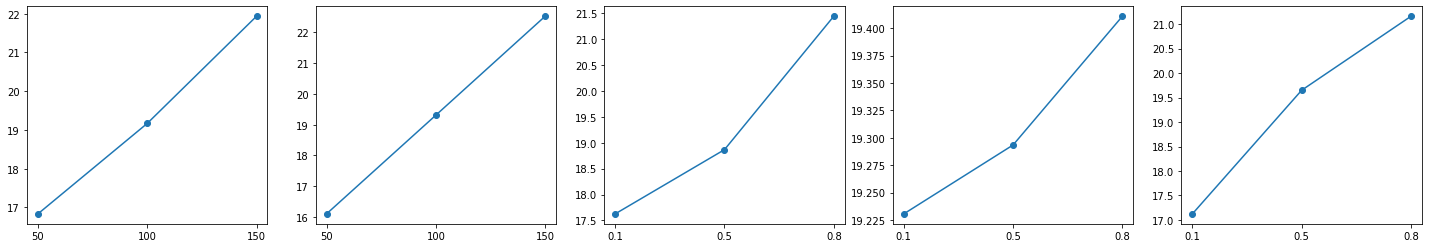

In [148]:
plt.figure(figsize=(25,4))
plt.subplot(1, 5, 1)
plt.plot(['50', '100', '150'], DOEResluts[0], '-o')
plt.subplot(1, 5, 2)
plt.plot(['50', '100', '150'], DOEResluts[1], '-o')
plt.subplot(1, 5, 3)
plt.plot(['0.1','0.5', '0.8'], DOEResluts[2], '-o')
plt.subplot(1, 5, 4)
plt.plot(['0.1','0.5', '0.8'], DOEResluts[3], '-o')
plt.subplot(1, 5, 5)
plt.plot(['0.1','0.5', '0.8'], DOEResluts[4], '-o')


In [139]:
particle_swarm_optimization(50, num_dimensions, 50, 0.1, 0.1, 0.1, functionName, lb, ub)[:2]

(7.4531348070559265,
 array([-1.13509483, -0.68647549,  1.57559207,  1.41978936,  1.15465802,
         0.03750996,  4.33040462, -1.91552071, -0.01367405, -1.08230035]))

In [97]:
# personal_weightParam = [0.1, 0.5, 0.8]
i = 2
FactResults[FactResults.iloc[:, i] == 0.1].mean(axis=1).mean(), FactResults[FactResults.iloc[:, i] == 0.5].mean(axis=1).mean()\
,FactResults[FactResults.iloc[:, i] == 0.8].mean(axis=1).mean()

(17.625698858930242, 18.866252500079145, 21.442943739140265)

In [ ]:
FactResults[FactResults.iloc[:, 0] == 50].mean(axis=1).mean(), FactResults[FactResults.iloc[:, 0] == 100].mean(axis=1).mean()\
,FactResults[FactResults.iloc[:, 0] == 150].mean(axis=1).mean()

In [67]:
pd.DataFrame(np.array(results))

,0,1,2,3,4,5,6,7,8,9
0,7.991859,5.971486,6.238077,5.679784,6.727567,4.855471,5.863860,5.220197,6.261207,6.889145
1,3.817695,7.704074,5.634694,5.729224,8.418752,8.368451,8.700824,6.372697,5.338503,3.994451
2,14.470441,13.042711,11.550107,12.296283,12.274109,9.477423,10.988866,11.177750,13.977146,10.452767
3,6.026663,5.888761,6.628511,5.416696,5.774636,5.620541,6.213365,5.983441,7.405246,5.344588
4,7.362112,5.818422,5.811952,7.554400,7.882617,8.304217,10.613775,10.086542,8.888184,9.007054
...,...,...,...,...,...,...,...,...,...,...
238,14.654880,12.850579,14.025018,10.901478,10.453985,11.590935,11.484584,11.256649,12.564586,12.069303
239,14.285372,13.708967,13.186814,11.903962,11.707539,12.011862,15.088543,16.980495,11.226274,12.644890
240,10.331579,10.919477,10.058625,8.806250,7.308142,9.831833,11.450228,3.336357,8.533360,3.870080
241,12.445990,13.041154,10.512922,13.076575,13.692523,10.965633,12.361604,12.689219,12.869388,13.798359


In [ ]:
plt.figure(figsize=(15, 10))
k = 1
for i in range(0, 12):
    FuncName = testProblems.iloc[i,1]
    FuncPython = testProblems.iloc[i,0]
    LB = testProblems.iloc[i,2]
    UB = testProblems.iloc[i,3]
    dim = testProblems.iloc[i,4]
    EPOClassic = PCA_classic(LB, UB, dim, 100, 100, 1, FuncPython)[2]
    EPO_LevyGaussian_Results = EPO_LevyGaussian(LB, UB, dim, 100, 100, 1, FuncPython)[2]
    EPOIV_Results = EPOIV(LB, UB, dim, 100, 100, 1, FuncPython)[2]
    plt.subplot(3, 4, k)
    plt.plot(EPOClassic, label = 'Classical EPO')
    plt.plot(EPO_LevyGaussian_Results, label = 'EPO LevyGaussian')
    plt.plot(EPOIV_Results, label = 'EPOIV')
    plt.legend() 
    plt.title(FuncName)
    plt.xlabel('Iterations')
    plt.ylabel('f(x)')
    plt.tight_layout()
    k += 1

In [ ]:
plt.figure(figsize=(15, 10))
k = 1
for i in range(12,20):
    FuncName = testProblems.iloc[i,0]
    FuncPython = testProblems.iloc[i,1]
    LB = testProblems.iloc[i,2]
    UB = testProblems.iloc[i,3]
    dim = testProblems.iloc[i,4]
    EPOClassic = PCA_classic(LB, UB, dim, 100, 100, 1, FuncPython)[2]
    EPO_LevyGaussian_Results = EPO_LevyGaussian(LB, UB, dim, 100, 100, 1, FuncPython)[2]
    EPOIV_Results = EPOIV(LB, UB, dim, 100, 100, 1, FuncPython)[2]
    plt.subplot(2, 4, k)
    plt.plot(EPOClassic, label = 'Classical EPO')
    plt.plot(EPO_LevyGaussian_Results, label = 'EPO LevyGaussian')
    plt.plot(EPOIV_Results, label = 'EPOIV')
    plt.legend() 
    plt.title(FuncName)
    plt.xlabel('Iterations')
    plt.ylabel('f(x)')
    plt.tight_layout()
    k += 1



In [ ]:
(LB, UB, dim, 100, 100, 1, fn)

In [ ]:
fn = 'spheref'
LB, UB, dim = -10, 10, 10 
EPO_LevyGaussian(LB, UB, dim, 100, 100, 1, fn)

In [ ]:
PCA_classic(LB, UB, dim, 100, 100, 1, fn)

In [ ]:
EPOIV(LB, UB, dim, 100, 100, 1, fn)[0:2]

In [ ]:
EPOWIV(LB, UB, dim, 20, 20, 1, fn)[0:2]

In [ ]:
import pandas as pd

In [ ]:
def LevyFligth(lastStep):
    mu = np.random.normal(loc=0, scale=np.sqrt(1.5))
    v = np.random.normal(loc=0, scale=np.sqrt(1.5))
    step = mu / (np.abs(v) ** (1/1.5))
    return (step + lastStep)

In [ ]:
def GaussianMutation(sol):
    gaussian_value = np.random.normal(loc=0, scale=np.sqrt(0.1))
    return(sol + gaussian_value)

In [ ]:
x = np.random.uniform(-5, 5, 5)

In [ ]:
x, GaussianMutation(x)

In [ ]:
LevyFligth(0)

In [ ]:
ConstrainedFunctions = pd.read_csv('ConstrainedProblems.csv')

In [ ]:
output = {}
ComparativeResultsMeans = {'Function':[],'EPOWIV Mean':[], 'EPOIV Mean':[], 'EPOW Mean': [], 'EPO Classical Mean':[]}
ComparativeResultsStd = {'EPOWIV Std':[], 'EPOIV Std':[], 'EPOW Std': [], 'EPO Classical Std':[]}
for i  in range(ConstrainedFunctions.shape[0]):
    fn = ConstrainedFunctions.iloc[i, 0]
    FunctionName = ConstrainedFunctions.iloc[i, 1]
    LB = ConstrainedFunctions.iloc[i, 2]
    UB = ConstrainedFunctions.iloc[i, 3]
    dim = ConstrainedFunctions.iloc[i, 4]
    if FunctionName not in output:
        output[FunctionName] = {}
    output[FunctionName]['EPOWIV'] = [EPOWIV(LB, UB, dim, 50, 100, 1, fn)[0] for _ in range(30)]
    output[FunctionName]['EPOIV'] = [PCA(LB, UB, dim, 50, 80, 1, fn)[0] for _ in range(30)]
    output[FunctionName]['EPOW'] = [PCAWeighted(LB, UB, dim, 50, 50, 1, fn)[0] for _ in range(30)]
    output[FunctionName]['EPO Classical'] = [PCA_classic(LB, UB, dim, 50, 50, 1, fn)[0] for _ in range(30)]
    # ComparativeResultsMeans['Function'].append(FunctionName)

In [ ]:
ComparativeResultsMeans = {'Function':[],'EPOWIV Mean':[], 'EPOIV Mean':[], 'EPOW Mean': [], 'EPO Classical Mean':[]}
ComparativeResultsStd = {'EPOWIV Std':[], 'EPOIV Std':[], 'EPOW Std': [], 'EPO Classical Std':[]}

In [ ]:
np.array(output[FunctionName]['EPOWIV']).mean()

In [ ]:
ComparativeResultsMeans = {'Function':[],'EPOWIV Mean':[], 'EPOIV Mean':[], 'EPOW Mean': [], 'EPO Classical Mean':[]}
ComparativeResultsStd = {'EPOWIV Std':[], 'EPOIV Std':[], 'EPOW Std': [], 'EPO Classical Std':[]}

In [ ]:
keys = list(ComparativeResultsMeans.keys())
keys0 = list(ComparativeResultsStd.keys())

In [ ]:
for FunctionName in output:
    ComparativeResultsMeans[keys[0]].append(FunctionName)
    ComparativeResultsMeans[keys[1]].append(np.array(output[FunctionName]['EPOWIV']).mean())
    ComparativeResultsMeans[keys[2]].append(np.array(output[FunctionName]['EPOIV']).mean())
    ComparativeResultsMeans[keys[3]].append(np.array(output[FunctionName]['EPOW']).mean())
    ComparativeResultsMeans[keys[4]].append(np.array(output[FunctionName]['EPO Classical']).mean())
    
    ComparativeResultsStd[keys0[0]].append(np.array(output[FunctionName]['EPOWIV']).std())
    ComparativeResultsStd[keys0[1]].append(np.array(output[FunctionName]['EPOIV']).std())
    ComparativeResultsStd[keys0[2]].append(np.array(output[FunctionName]['EPOW']).std())
    ComparativeResultsStd[keys0[3]].append(np.array(output[FunctionName]['EPO Classical']).std())
    

In [ ]:
pd.concat([pd.DataFrame(ComparativeResultsMeans), pd.DataFrame(ComparativeResultsStd)], axis=1).to_csv('ConstrainedReults.csv', index = False)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure(figsize= (15, 15))
labels = ['EPOWIV', 'EPOIV', 'EPOW', 'EPO Classical']
j = 1
for FunctionName in output:
    ax = fig.add_subplot(3, 2, j)
    plt.boxplot([output[FunctionName]['EPOWIV'], output[FunctionName]['EPOIV'], output[FunctionName]['EPOW']\
                ,output[FunctionName]['EPO Classical']], showfliers=False, labels=labels)
    ax.set_title(FunctionName)
    j +=1

In [ ]:
optimal = [0 , 0 , 106.76, -2.0239, -1.0316, -0.072] 

In [ ]:
labels = ['EPOWIV', 'EPOIV', 'EPOW', 'EPO Classical']

In [ ]:
fig.add_subplot(2, 3, 1)
plt.boxplot([output[FunctionName]['EPOWIV'], output[FunctionName]['EPOIV'], output[FunctionName]['EPOW']\
            ,output[FunctionName]['EPO Classical']], showfliers=False, labels=labels)

In [ ]:
output.keys()

In [ ]:
output['Rosenbrock function constrained with a cubic and a line']['EPOIV']

In [ ]:
EPOWIV(-8192, 8192, 9, 50, 50, 1, 1)

In [ ]:
EPOWIV(-2.25, 2.25, 2, 100, 300, 1, 'Townsend')

In [ ]:
PCA(-8192, 8192, 9, 100, 500, 1, 1)

In [ ]:
particle_swarm_optimization(100, 2, 300, 0.3, 0.6, 0.9, 'ACKLEY', -10, 0)

In [ ]:
PCAWeighted(-8192, 8192, 9, 100, 1000, 1, 1)

In [ ]:
PCA_classic(-8192, 8192, 9, 100, 100, 1, 1)

In [ ]:
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def RosenbrockConstrained1(x):
    if ((x[0] - 1)**3 - x[1] + 1) <= 0 and (x[0] + x[1] - 2) <= 0:
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    else:
        return float('Inf')

# Define the range of x and y values
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Calculate the function values
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = RosenbrockConstrained1([X[i, j], Y[i, j]])

# Create the contour plot
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of RosenbrockConstrained1')
plt.show()


In [ ]:
from FunctionCall import *

In [ ]:
from penguins_Algorithm_modified_3 import *
from ParticleSwarm import *

In [ ]:
testFunctions = pd.read_csv('ConstrainedProblems.csv')

In [ ]:
testFunctions.iloc[0,0]

In [ ]:
MeanResult = {'Function':[],'MEPO Mean':[], 'EPOW Mean':[], 'EPO Classical Mean':[], 'PSO Mean':[]\
              ,'MEPO Std':[], 'EPOW Std':[], 'EPO Classical Std':[], 'PSO Std':[]}
for i in range(testFunctions.shape[0]):
    FunctionName = testFunctions.iloc[i,0]
    dim = testFunctions.iloc[i, 4]
    MeanResult['Function'].append(FunctionName)
    LB = float(testFunctions.iloc[i, 2])
    UB = float(testFunctions.iloc[i, 3])
    result = np.array([PCA(LB, UB, dim, 100, 100, 1, FunctionName)[0] for _ in range(10)])
    MeanResult['MEPO Mean'].append(result.mean())
    MeanResult['MEPO Std'].append(result.std())
    result = np.array([PCAWeighted(LB, UB, dim, 100, 100, 1, FunctionName)[0] for _ in range(10)])
    MeanResult['EPOW Mean'].append(result.mean())
    MeanResult['EPOW Std'].append(result.std())
    result = np.array([PCA_classic(LB, UB, dim, 100, 100, 1, FunctionName)[0] for _ in range(10)])
    MeanResult['EPO Classical Mean'].append(result.mean())
    MeanResult['EPO Classical Std'].append(result.std())
    result = np.array([particle_swarm_optimization(100, dim, 100, 0.3, 0.7, 0.2, FunctionName, LB, UB)[1]\
                        for _ in range(10)])
    MeanResult['PSO Mean'].append(result.mean())
    MeanResult['PSO Std'].append(result.std())    

In [ ]:
MeanResult['EPOW Std'] = MeanResult['EPOW Std'][0:31]

In [ ]:
pd.DataFrame(MeanResult).to_csv('Results 31.csv', index = False)

In [ ]:
from scipy.stats import wilcoxon

# Sample data
data1 = [6, 8, 14, 16, 18]
data2 = [6, 9, 14, 16, 18]

# Perform the Wilcoxon Signed-Rank Test
statistic, p_value = wilcoxon(data1, data2)
print("Wilcoxon statistic:", statistic)
print("p-value:", p_value)

In [ ]:
from cec2019comp100digit import cec2019comp100digit

In [ ]:
bench = cec2019comp100digit
bench.init(3, 10) # Init function 3 with dimension 10

In [ ]:
bench.eval(np.random.uniform(-5, 5, 10))